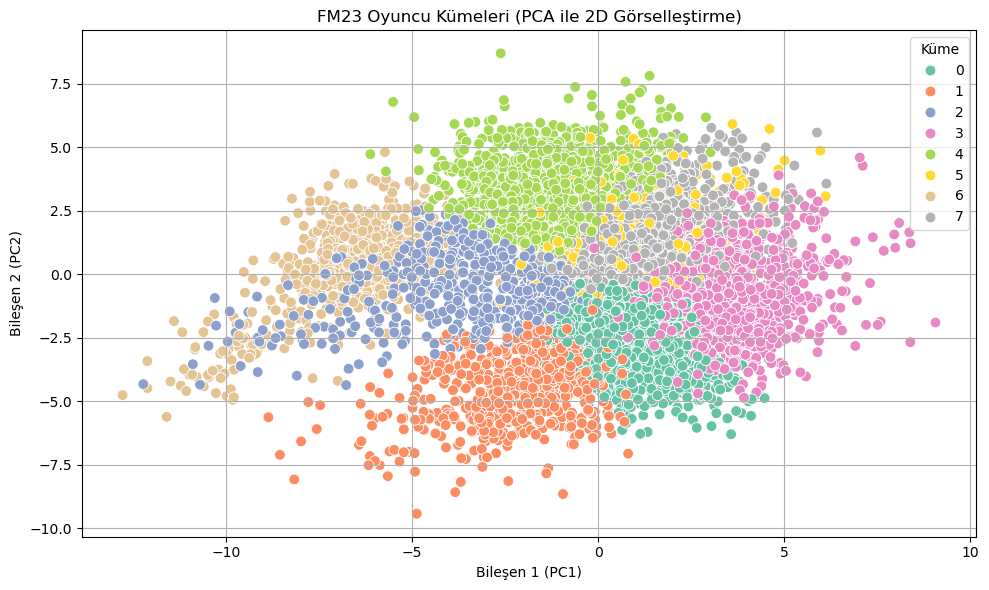

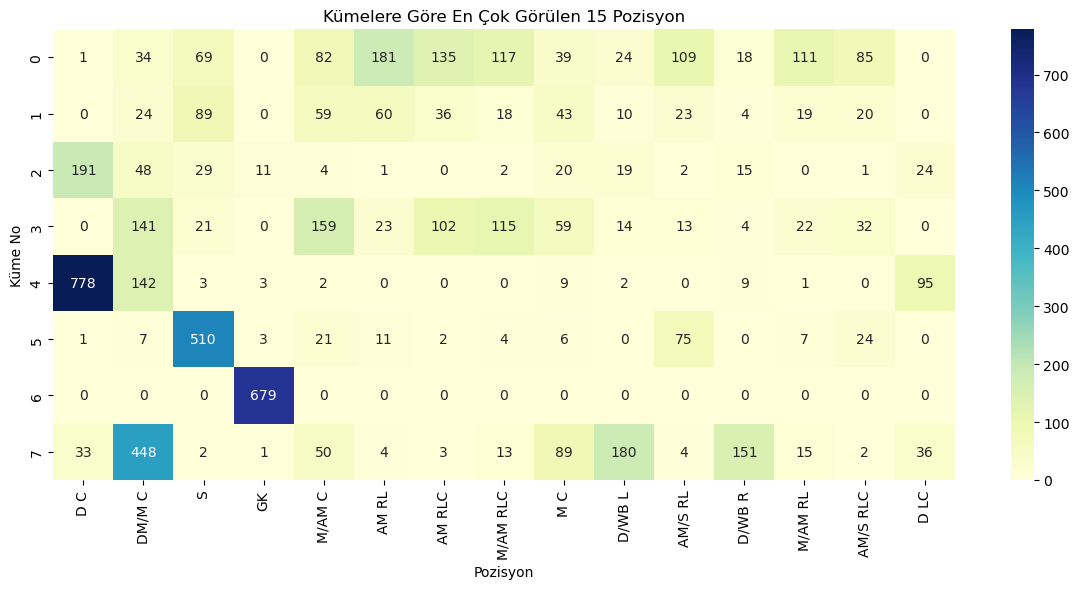

In [1]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# VERİYİ YÜKLE
df = pd.read_csv("FM 2023.csv")

# Oyuncu Özellikleri
teknik = [
    'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
    'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
    'Penalty Taking', 'Tackling', 'Technique', 'Corners'
]
zihinsel = [
    'Aggressiion', 'Anticipation', 'Bravery', 'Composure', 'Concentration',
    'Vision', 'Decision', 'Determination', 'Flair', 'Leadership',
    'Off The Ball', 'Teamwork', 'Work Rate'
]
fiziksel = [
    'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
    'Natural Fitness', 'Pace', 'Stamina', 'Strength'
]

ozellikler = teknik + zihinsel + fiziksel

# Kolon seçme
df_selected = df[ozellikler].copy()
df_selected.dropna(inplace=True)

# Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# KMeans - 8 küme
kmeans = KMeans(n_clusters=8, random_state=42)
df_selected["Küme"] = kmeans.fit_predict(X_scaled)

# ORİJİNAL POZİSYONU EKLE
df_selected["Position"] = df.loc[df_selected.index, "Position"]

# --- PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Küme"] = df_selected["Küme"].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Küme", palette="Set2", s=60)
plt.title("FM23 Oyuncu Kümeleri (PCA ile 2D Görselleştirme)")
plt.xlabel("Bileşen 1 (PC1)")
plt.ylabel("Bileşen 2 (PC2)")
plt.legend(title="Küme")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Heatmap---
# En çok geçen 15 pozisyon
position_cluster_counts = pd.crosstab(df_selected["Küme"], df_selected["Position"])
top_positions = position_cluster_counts.sum().sort_values(ascending=False).head(15).index
position_cluster_counts = position_cluster_counts[top_positions]

plt.figure(figsize=(12, 6))
sns.heatmap(position_cluster_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Kümelere Göre En Çok Görülen 15 Pozisyon")
plt.xlabel("Pozisyon")
plt.ylabel("Küme No")
plt.tight_layout()
plt.show()